# HEART DISEASE PREDICTION

In [5]:
# IMPORT ALL LIBRARIES 
import os # # path execution
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt 
import seaborn as sns

In [6]:
pwd

'C:\\Users\\dip.ranjan\\Downloads'

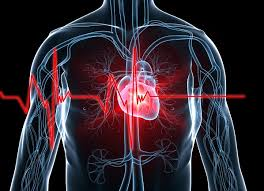

In [7]:
from IPython.display import Image
Image(filename='download (2).jpg')


In [8]:
# LOAD THE FILE 
data=pd.read_csv("heart.csv")

In [9]:
#CHECK THE FIRST 5 ROWS AND LAST 5 ROWS 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# EDA (EXPLORATORY DATA ANALYSIS)

In [10]:
# CHECK THE MISSING VALUE IN DATA 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

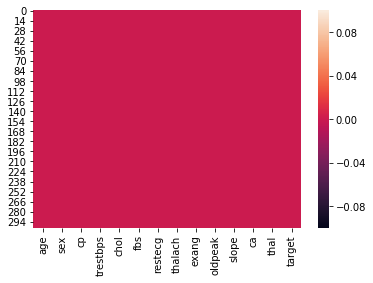

In [11]:
#  we use the seaborn library to visualize the null values
sns.heatmap(data.isnull())

# IT SHOWS THEIE IS NO MISSING VALUE IN THE DATA

In [9]:
#lets check the all the features present in dat
list(data)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [16]:
# check the how many observation and attributes present in the data
data.shape

(303, 14)

# Now, we can see that the dataset contains 303 instances and 14 variables.

In [17]:
# check the datatypes of each variable
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
# statistical properties of dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Univariate analysis

In [8]:
# Check the number of unique values in target variables
data["target"].nunique()

2

In [9]:
data["target"].unique()

array([1, 0], dtype=int64)

In [11]:
#ACCORDING TO DATA ,TARGET FEATURE (dependent variable) IS MY PREDICTION TO CHECK PATIENTS HAVE HEART DISEASE OR NOT
# CHECK HOW MANY PATIENTS HAVE HAERT DISESE OR NOT , SO I USED COUNTS FUNCTION
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
# check what is percentage of patients have heart disease
counthavedisease=len(data[data.target==1])
countnodisease=len(data[data.target==0])
print("percentage of patients have heart disease : {0:.2f}%".format((counthavedisease/(len(data.target))*100)))
print("percentage of patients haven't disease : {0:.2f}%".format((countnodisease/(len(data.target))*100)))

percentage of patients have heart disease : 54.46%
percentage of patients haven't disease : 45.54%


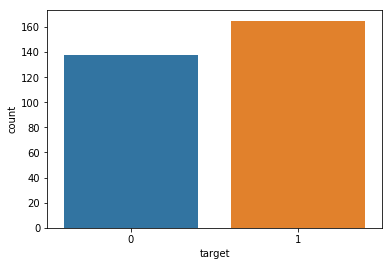

In [78]:
sns.countplot(x="target",data=data)

# Bivariate Analysis

In [81]:
# check the percentage of male and female patients having heart disease
countmale=len(data[data.sex==1])
countfemale=len(data[data.sex==0])
print("percentage of male patients : {0:.2f}%".format(countmale/len(data.sex)*100))
print("percentage of female patients : {0:.2f}%".format(countfemale/len(data.sex)*100))

percentage of male patients : 68.32%
percentage of female patients : 31.68%


In [13]:
# lets check the frequency of target with sex
data.groupby("sex")["target"].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

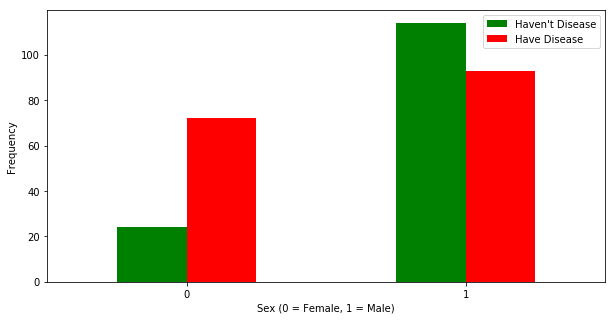

In [70]:
#let's compare the sex and target feature ,so i am using boxplot to compare betwwen them.


import matplotlib.pyplot as plt

pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,5),color=['green','red'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
           
plt.ylabel('Frequency')
plt.show()


In [69]:
# check the unique value of fbs(fasting blood sugar)
data["fbs"].nunique()

2

In [65]:
## lets groupby between fbs and target
data.groupby("fbs")["target"].value_counts()

fbs  target
0    1         142
     0         116
1    1          23
     0          22
Name: target, dtype: int64

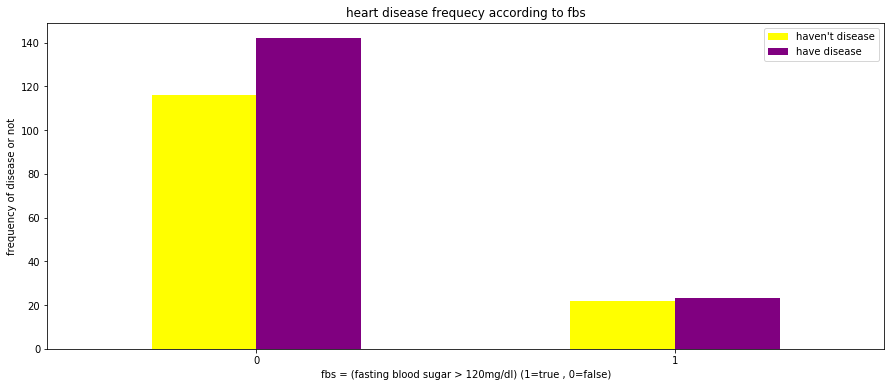

In [69]:
# visualize the target value with fbs(fasting blood sugar)and exang(excercise induced angina)
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['yellow','purple' ])
plt.title("heart disease frequecy according to fbs")
plt.xlabel("fbs = (fasting blood sugar > 120mg/dl) (1=true , 0=false)")
plt.xticks(rotation=0)
plt.legend(["haven't disease","have disease"])
plt.ylabel("frequency of disease or not")
plt.show()



In [68]:
# check the unique value of exang(Exercise induced angina)
data["exang"].nunique()

2

In [70]:
## lets groupby between exang and target
data.groupby("exang")["target"].value_counts()

exang  target
0      1         142
       0          62
1      0          76
       1          23
Name: target, dtype: int64

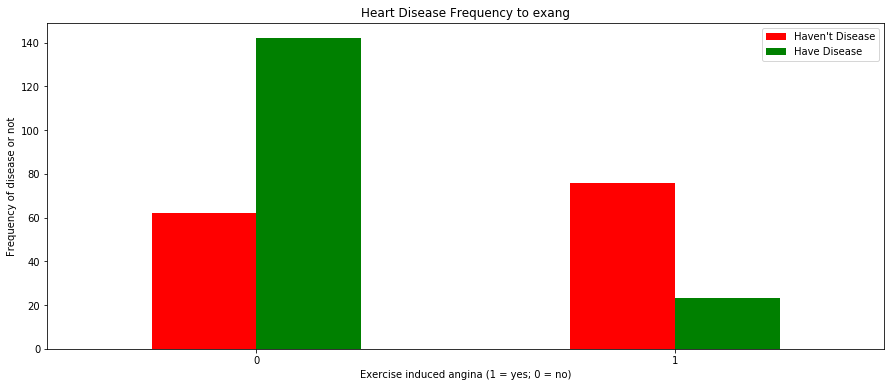

In [70]:
pd.crosstab(data.exang,data.target).plot(kind="bar",figsize=(15,6),color=['red','green' ])
plt.title('Heart Disease Frequency to exang')
plt.xlabel('Exercise induced angina (1 = yes; 0 = no)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of disease or not')
plt.show()


In [31]:
# check unique values in age variable
data["age"].unique()
data["age"].nunique()

41

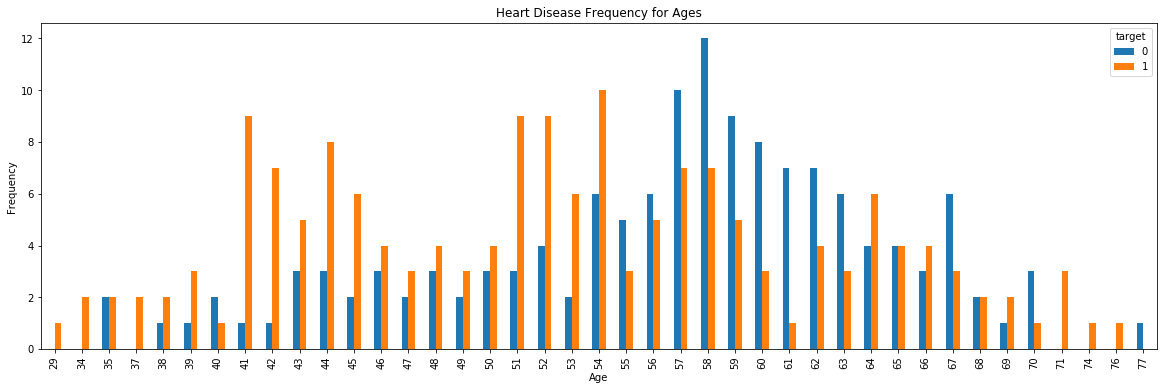

In [78]:
# lets visualize between target and age
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


In [24]:
#I will check number of unique values in thalach variable
data["thalach"].nunique()
#data["thalach"].unique()

91

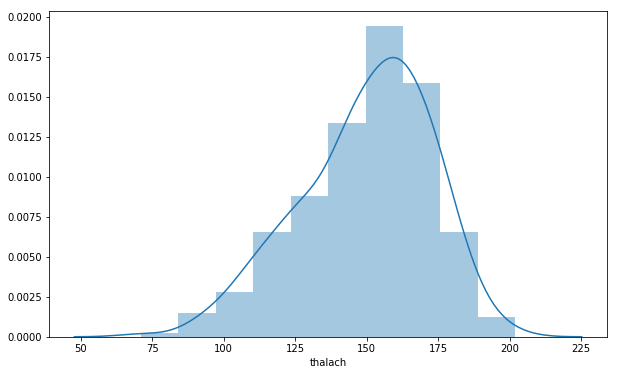

In [25]:
 # lets Visualize the frequency distribution of thalach variable
f, ax = plt.subplots(figsize=(10,6))
x = data['thalach']
ax = sns.distplot(x, bins=10)
plt.show()

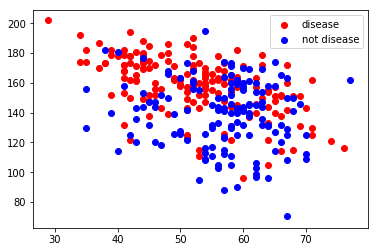

In [82]:
#lets check the person's maximum heart rate achieved to compair between ages and thalach

plt.scatter(x=data.age[data.target==1],y=data.thalach[data.target==1],c="red")
plt.scatter(x=data.age[data.target==0],y=data.thalach[data.target==0],c="blue")
plt.legend(["disease","not disease"])
plt.xlabel=("Age")
plt.ylabel=("Maximum heart rate")
plt.show()

In [76]:
#check number of unique values in slope variable.
data["slope"].nunique()

3

In [77]:
#Now, I will view its frequency distribution 
data["slope"].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [74]:
#lets groupby between slope and target
data.groupby("slope")["target"].value_counts()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      1         107
       0          35
Name: target, dtype: int64

In [ ]:
#slope variable contains three integer values 0, 1, 2 .
#target variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease

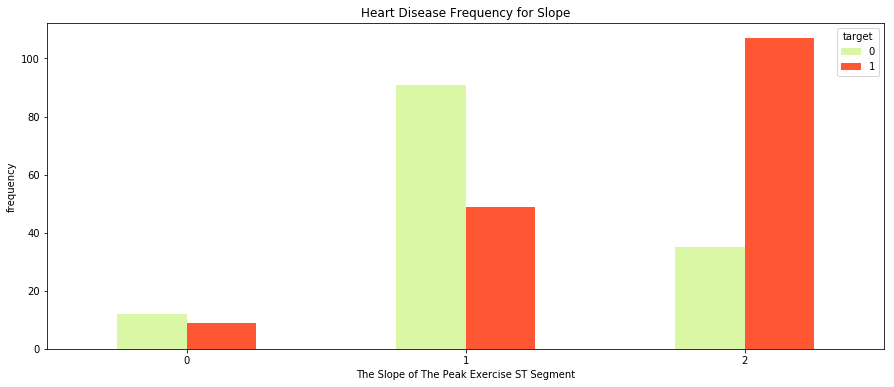

In [16]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title("Heart Disease Frequency for Slope")
plt.xlabel("The Slope of The Peak Exercise ST Segment")
plt.xticks(rotation = 0)
plt.ylabel("frequency")
plt.show()


In [59]:
#Analysis of target and cp variable 
#cp stands for chest pain type.
#First, I will check number of unique values in cp variable.
data["cp"].nunique()

4

In [61]:
#Now, I will view its frequency distribution 
data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [62]:
# lets groupby between cp and target
data.groupby("cp")["target"].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

In [ ]:
#cp variable contains four integer values 0, 1, 2 and 3.
#target variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)
#So, the above analysis gives target variable values categorized into presence and absence of heart disease and groupby cp variable values.


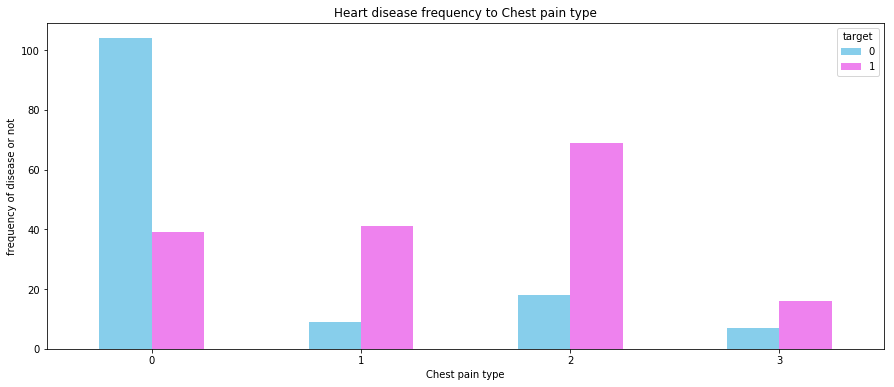

In [58]:
#lets visualize between target and cp(The chest pain experienced)
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=["skyblue","violet" ])
plt.title("Heart disease frequency to Chest pain type")
plt.xlabel("Chest pain type")
plt.xticks(rotation=0)
plt.ylabel("frequency of disease or not")

plt.show()


# Multivariate analysis

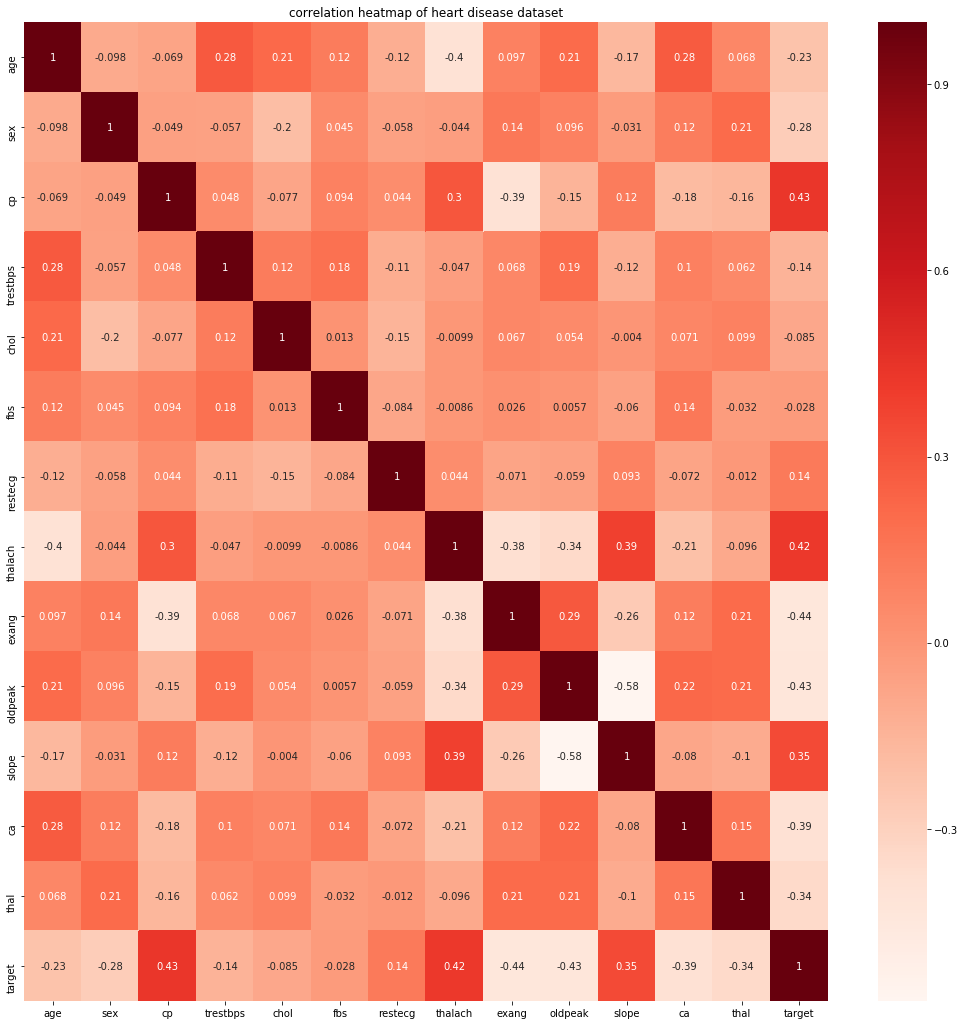

In [49]:
# I will use heat map and pair plot to discover the patterns and relationships in the dataset.

fig=plt.figure(figsize=(18,18))
plt.title("correlation heatmap of heart disease dataset")
sns.heatmap(data.corr(), annot= True, cmap='Reds')




In [57]:
# Corelation with target

x =data.corr()
pd.DataFrame(x['target']).sort_values(by='target',ascending = False).style.background_gradient(cmap = 'Blues')

,target
target,1
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.13723
fbs,-0.0280458
chol,-0.0852391
trestbps,-0.144931
age,-0.225439
sex,-0.280937


In [53]:
#lets check the ouliers present in dataset
# I  will make boxplots to visualise outliers in the continuous numerical variables : -
# age,trestbps, chol, thalach and oldpeak variables.
#1 age variable
data["age"].describe()


count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

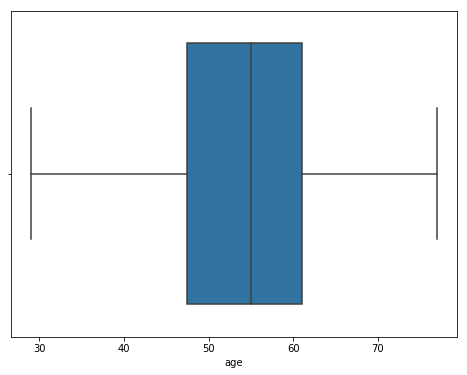

In [56]:
f,ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=data["age"])
plt.show()

In [62]:
#2 tresbps variable
data["trestbps"].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

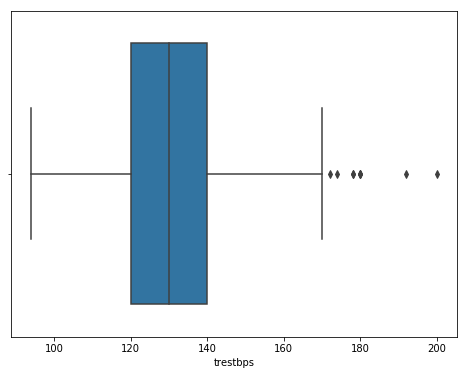

In [68]:
f ,ax= plt.subplots(figsize=(8, 6))
sns.boxplot(x=data["trestbps"])
plt.show()


In [11]:
#3 chol variable
data["chol"].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

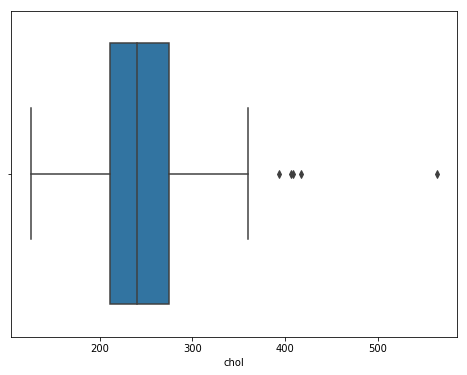

In [20]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=data["chol"])
plt.show()

In [21]:
#4 thalach variable
data["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

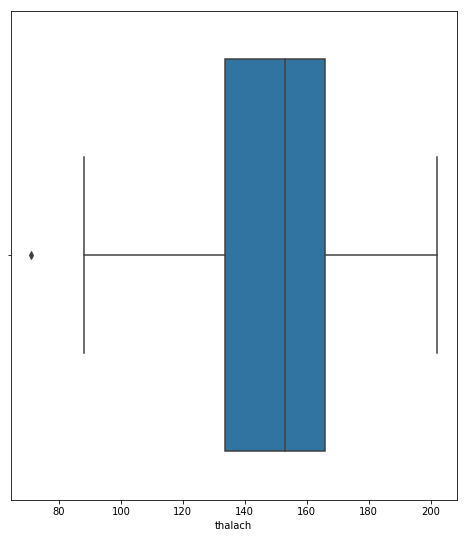

In [25]:
f,ax=plt.subplots(figsize=(8,9))
sns.boxplot(x=data["thalach"])
plt.show()

In [26]:
#5 oldpeak variable
data["oldpeak"].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

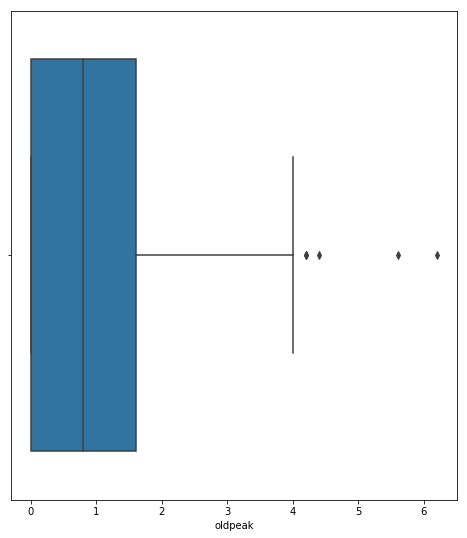

In [32]:
f,ax=plt.subplots(figsize=(8,9))
sns.boxplot(x=data["oldpeak"])
plt.show()

# The model
# first model I am using logistic regression

In [12]:
# split datasets in features and target variable
X = data.drop(['target'], axis = 1) #features
y = data.target.values # target variable

In [14]:
from sklearn.linear_model import LogisticRegression # for the model
from sklearn.model_selection import train_test_split # for data splitting


In [77]:
import statsmodels.api as sm
#split th data

X_train, X_test, y_train, y_test = train_test_split(data.drop('target',axis=1),data['target'],
test_size=0.30,random_state=42)

# here ,the dataset is split into two parts in a ratio 70:30.
# It means 70% data will be used for model training & 30% data used for model testing.


In [85]:
X_train.shape,X_test.shape

((273, 13), (30, 13))

# Preprocessing - Scaling the features



In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [78]:
# Setting parameters for GridSearchCV
from sklearn.model_selection import GridSearchCV
log = LogisticRegression()
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logmodel = GridSearchCV(log,param_grid=params,cv=10)



In [20]:
#training and predicting
log = LogisticRegression() # default parameter
logmodel.fit(X_train,y_train)

C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dip.ranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
logmodel.best_params_


{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [35]:
# making prediction
predict = logmodel.predict(X_test)

In [36]:
#Evaluation
#We can check precision, recall, f1-score using classification report!
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,predict))
print("Accuracy:",metrics.accuracy_score(y_test, predict))




              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

   micro avg       0.82      0.82      0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Accuracy: 0.8241758241758241


In [38]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',round(accuracy_score(y_test,predict),5)*100,'%')


Accuracy Score:  0.8241758241758241
Using Logistic Regression we get an accuracy score of:  82.418 %



# confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix


array([[33,  8],
       [ 8, 42]], dtype=int64)

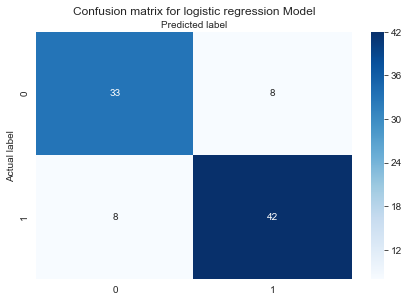

In [55]:

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "Blues",
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



In [30]:
sensitivity2= cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])
print('Sensitivity/Recall : ', sensitivity2)

specificity2 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity : ', specificity2)

precision2 = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
print('Precision   : ', precision2)

F1score2=(2*sensitivity2*precision2)/(sensitivity2+precision2)
print('F1 score    : ', F1score2)

Sensitivity/Recall :  0.84
Specificity :  0.8048780487804879
Precision   :  0.84
F1 score    :  0.8399999999999999


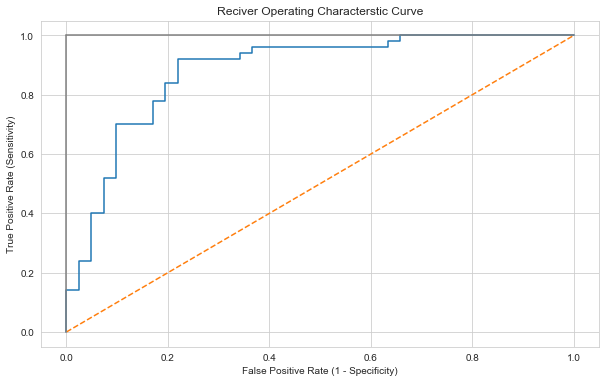

In [40]:
from sklearn.metrics import roc_auc_score,roc_curve


target_probailities_log = logmodel.predict_proba(X_test)[:,1]
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [41]:
#Calculate area under the curve
from sklearn.metrics import roc_auc_score,roc_curve

roc_auc_score(y_test,target_probailities_log)


0.8804878048780488

In [48]:
from sklearn.metrics import accuracy_score
log_ac=accuracy_score(y_test,predict)


In [49]:
print('LogisticRegression_accuracy:\t',log_ac)
print('SVM_regressor_accuracy:\t\t',svr_ac)


LogisticRegression_accuracy:	 0.8241758241758241


NameError: name 'svr_ac' is not defined

In [50]:
model_accuracy = pd.Series(data=[log_ac], 
                index=['LogisticRegression']
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')


SyntaxError: invalid syntax (<ipython-input-50-29698c054bda>, line 3)